# NB on Amazon fine food dataset

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

#### Objective:
To perform NB on different vectors like BOW, Tf-idf, Avg-W2vec & Tf-idf_W2vec.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

C:\Users\deepak\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#Importing Train and test dataset
train_data=pd.read_csv("E:/Applied AI assignments/Amazon_fine_train_data.csv")
test_data=pd.read_csv("E:/Applied AI assignments/Amazon_fine_test_data.csv")

In [3]:
train_data=train_data.astype(str)
test_data=test_data.astype(str)

In [35]:
train_data.shape

(80000, 13)

In [36]:
train_data['Score'].value_counts()

positive    70407
negative     9593
Name: Score, dtype: int64

In [37]:
test_data.shape

(20000, 13)

In [38]:
test_data['Score'].value_counts()

positive    17322
negative     2678
Name: Score, dtype: int64

In [4]:
#Train data
y_train = train_data['Score']
x_train = train_data['CleanedText']

#Test data
y_test = test_data['Score']
x_test = test_data['CleanedText'] 

In [5]:
#Replacing Positive score with 0 and negative score with 1
y_train.replace('negative',1,inplace=True)
y_train.replace('positive',0,inplace=True)

y_test.replace('negative',1,inplace=True)
y_test.replace('positive',0,inplace=True)

In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Using Bernauli NB

#### Running Gridsearch CV 

In [112]:
alpha_range = [0.000001,0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,10,20,30,40,50]
T= TimeSeriesSplit(n_splits=5)

param_grid = dict(alpha=alpha_range)
print(param_grid)

# instantiate and fit the grid
grid = GridSearchCV(BernoulliNB(), param_grid, cv=T, scoring='accuracy', return_train_score=False,n_jobs=-1)

{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 30, 40, 50]}


#### Binary Bow

In [10]:
count_vect = CountVectorizer(binary=True)

#Train data
vocabulary = count_vect.fit(x_train) #in scikit-learn
Bow_x_train= count_vect.transform(x_train)
print("the type of count vectorizer ",type(Bow_x_train))
print("the shape of out text BOW vectorizer ",Bow_x_train.get_shape())
print("the number of unique words ", Bow_x_train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (80000, 33433)
the number of unique words  33433


In [11]:
#Test data
Bow_x_test = count_vect.transform(x_test)
print("the type of count vectorizer ",type(Bow_x_test))
print("the shape of out text BOW vectorizer ",Bow_x_test.get_shape())
print("the number of unique words ", Bow_x_test.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (20000, 33433)
the number of unique words  33433


#### Fitting Grid Search CV on BOW 

In [58]:
grid.fit(Bow_x_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8992424810620265
{'alpha': 0.1}


In [115]:
# Naive bayes 
Bnb_optimal=BernoulliNB(alpha=0.1, binarize=0.0, fit_prior=True)

# fitting the model
Bnb_optimal.fit(Bow_x_train, y_train)

# predict the response
pred_bow = Bnb_optimal.predict(Bow_x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred_bow) * 100
print('\nThe accuracy of the Bernaulli NB classifier for a = %d is %f%%' % (0.1, acc))


The accuracy of the Bernaulli NB classifier for a = 0 is 90.045000%


In [72]:
# Train & Test Error
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(y_train,Bnb_optimal.predict(Bow_x_train)))
print("The overall accuracy score for the Test Data is : ", metrics.accuracy_score(y_test,pred_bow))

The overall accuracy score for the Train Data is :  0.9273625
The overall accuracy score for the Test Data is :  0.90045


In [73]:
#Feature importance
neg_class_prob_sorted = Bnb_optimal.feature_log_prob_[1, :].argsort()
pos_class_prob_sorted = Bnb_optimal.feature_log_prob_[0, :].argsort()

neg_bow_bnb=neg_class_prob_sorted[::-1]
pos_bow_bnb=pos_class_prob_sorted[::-1]

In [78]:
#Top 20 negative words
n=(np.take(count_vect.get_feature_names(), neg_bow_bnb[:20]))
sn = ""
for i in n:
    sn += str(i)+","
print(sn)

tast,like,product,one,would,tri,good,flavor,buy,get,use,dont,order,even,much,make,love,realli,eat,time,


In [79]:
#Top 20 positive words
p=(np.take(count_vect.get_feature_names(), pos_bow_bnb[:20]))
sp = ""
for i in p:
    sp += str(i)+","
print(sp)

tast,like,great,good,love,flavor,one,use,product,tri,make,get,best,time,buy,find,amazon,eat,realli,also,


************ Top 20 Negative words *******************


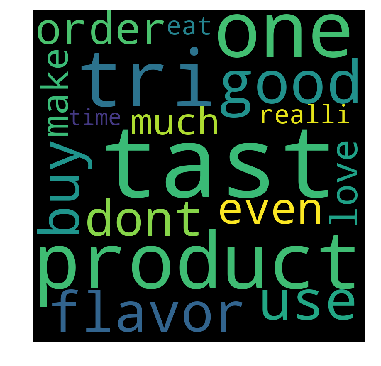

************ Top 20 Positive words *******************


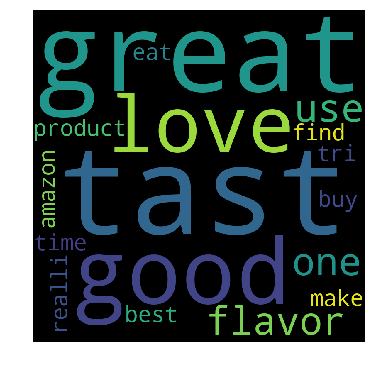

In [80]:
print("************ Top 20 Negative words *******************")
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(sn) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


print("************ Top 20 Positive words *******************")
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(sp) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [81]:
#confusion matrix, Precision score & Recall score
C = confusion_matrix(y_test, pred_bow)
A =(((C.T)/(C.sum(axis=1))).T)
B =(C/C.sum(axis=0))
labels = [0,1]

-------------------- Confusion matrix --------------------


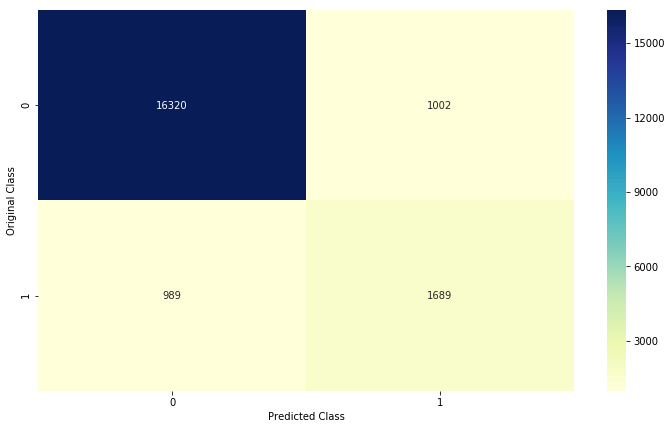

-------------------- Precision matrix (Columm Sum=1) --------------------


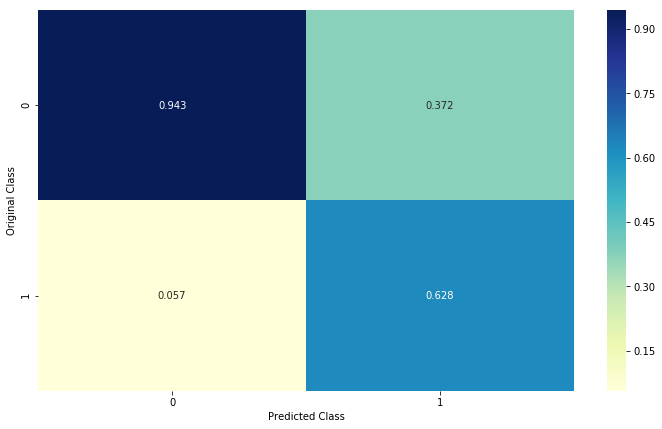

-------------------- Recall matrix (Row sum=1) --------------------


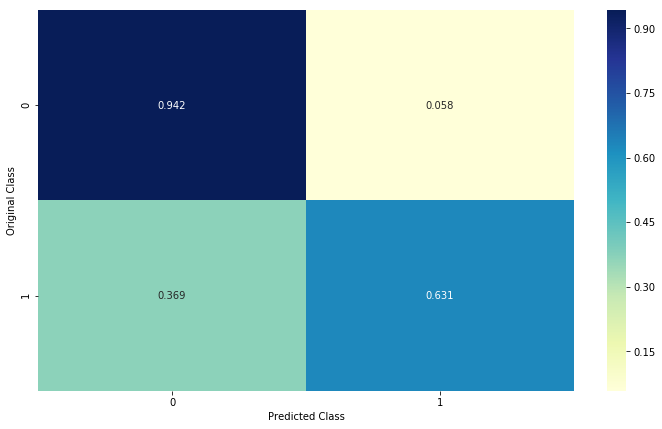

In [82]:
 print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(C, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
    
    # representing B in heatmap format
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### Tf-Idf

In [12]:
#Initiating Vectorizer
count_vect = CountVectorizer(ngram_range=(1,2))

#Train data
vocabulary = count_vect.fit(x_train)
Tfidf_x_train= count_vect.transform(x_train)
print("the type of count vectorizer ",type(Tfidf_x_train))
print("the shape of out text BOW vectorizer ",Tfidf_x_train.get_shape())
print("the number of unique words ", Tfidf_x_train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (80000, 1013943)
the number of unique words  1013943


In [13]:
#Test data
Tfidf_x_test= count_vect.transform(x_test)
print("the type of count vectorizer ",type(Tfidf_x_test))
print("the shape of out text BOW vectorizer ",Tfidf_x_test.get_shape())
print("the number of unique words ", Tfidf_x_test.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (20000, 1013943)
the number of unique words  1013943


#### Fitting Grid Search CV on Tf-Idf 

In [85]:
grid.fit(Tfidf_x_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8943373584339609
{'alpha': 0.0001}


In [118]:
# Naive bayes 
Bnb_optimal=BernoulliNB(alpha=0.0001, binarize=0.0, fit_prior=True)

# fitting the model
Bnb_optimal.fit(Tfidf_x_train, y_train)

# predict the response
pred_tfidf = Bnb_optimal.predict(Tfidf_x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred_tfidf) * 100
print('\nThe accuracy of the Bernoulli NB classifier for a = %d is %f%%' % (0.0001, acc))


The accuracy of the Bernoulli NB classifier for a = 0 is 88.180000%


In [87]:
# Train & Test Error
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(y_train,Bnb_optimal.predict(Tfidf_x_train)))
print("The overall accuracy score for the Test Data is : ", metrics.accuracy_score(y_test,pred_tfidf))

The overall accuracy score for the Train Data is :  0.998775
The overall accuracy score for the Test Data is :  0.8818


In [89]:
#Feature importance
neg_class_prob_sorted = Bnb_optimal.feature_log_prob_[1, :].argsort()
pos_class_prob_sorted = Bnb_optimal.feature_log_prob_[0, :].argsort()

neg_tfidf_bnb=neg_class_prob_sorted[::-1]
pos_tfidf_bnb=pos_class_prob_sorted[::-1]

In [90]:
#Top 20 negative words
n=(np.take(count_vect.get_feature_names(), neg_tfidf_bnb[:20]))
sn = ""
for i in n:
    sn += str(i)+","
print(sn)

tast,like,product,one,would,tri,good,flavor,buy,get,use,dont,order,even,much,make,love,realli,eat,time,


In [91]:
#Top 20 positive words
p=(np.take(count_vect.get_feature_names(), pos_tfidf_bnb[:20]))
sp = ""
for i in p:
    sp += str(i)+","
print(sp)

tast,like,great,good,love,flavor,one,use,product,tri,make,get,best,time,buy,find,amazon,eat,realli,also,


************ Top 20 Negative words *******************


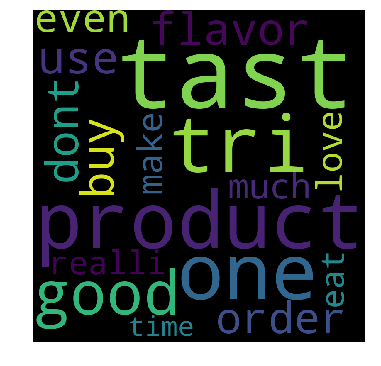

************ Top 20 Positive words *******************


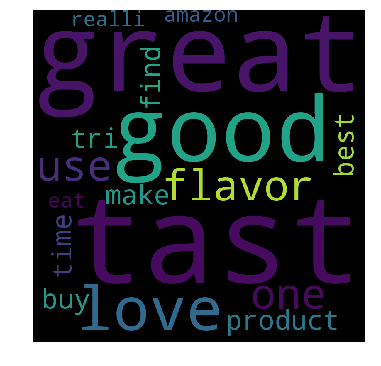

In [92]:
print("************ Top 20 Negative words *******************")
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(sn) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


print("************ Top 20 Positive words *******************")
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(sp) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [93]:
#confusion matrix, Precision score & Recall score
C = confusion_matrix(y_test, pred_tfidf)
A =(((C.T)/(C.sum(axis=1))).T)
B =(C/C.sum(axis=0))
labels = [0,1]

-------------------- Confusion matrix --------------------


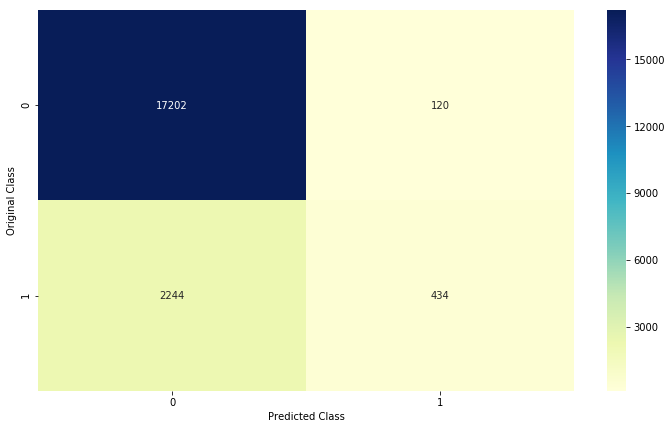

-------------------- Precision matrix (Columm Sum=1) --------------------


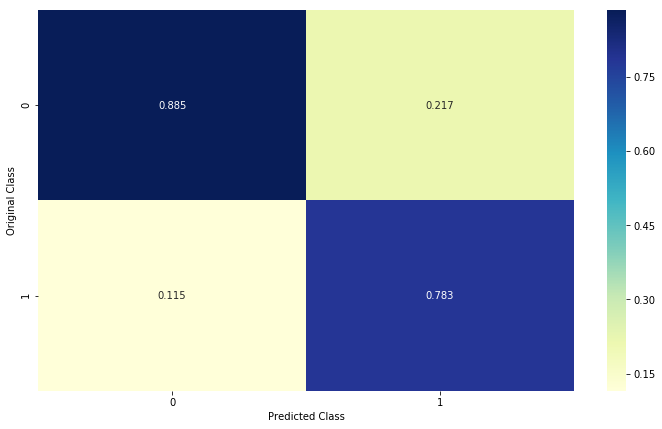

-------------------- Recall matrix (Row sum=1) --------------------


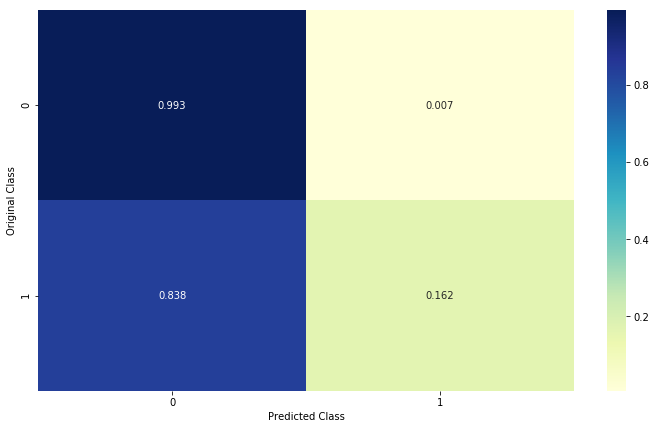

In [94]:
 print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(C, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
    
    # representing B in heatmap format
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## Using MultinomialNB

#### Running Gridsearch CV 

In [8]:
alpha_range = [0.000001,0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,10,20,30,40,50]
T= TimeSeriesSplit(n_splits=5)

param_grid = dict(alpha=alpha_range)
print(param_grid)

# instantiate and fit the grid
grid = GridSearchCV(MultinomialNB(), param_grid, cv=T, scoring='accuracy', return_train_score=False,n_jobs=-1)

{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 30, 40, 50]}


#### Fitting Grid Search CV on BOW 

In [14]:
grid.fit(Bow_x_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9072976824420611
{'alpha': 0.5}


In [15]:
# Naive bayes 
Mnb_optimal=MultinomialNB(alpha=0.5,fit_prior=True)

# fitting the model
Mnb_optimal.fit(Bow_x_train, y_train)

# predict the response
pred_bow = Mnb_optimal.predict(Bow_x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred_bow) * 100
print('\nThe accuracy of the Multinomial NB classifier for a = %d is %f%%' % (0.5, acc))


The accuracy of the Multinomial NB classifier for a = 0 is 90.920000%


In [98]:
# Train & Test Error
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(y_train,Mnb_optimal.predict(Bow_x_train)))
print("The overall accuracy score for the Test Data is : ", metrics.accuracy_score(y_test,pred_bow))

The overall accuracy score for the Train Data is :  0.9290625
The overall accuracy score for the Test Data is :  0.9092


In [99]:
#Feature importance
neg_class_prob_sorted = Mnb_optimal.feature_log_prob_[1, :].argsort()
pos_class_prob_sorted = Mnb_optimal.feature_log_prob_[0, :].argsort()

neg_bow_Mnb=neg_class_prob_sorted[::-1]
pos_bow_Mnb=pos_class_prob_sorted[::-1]

In [100]:
#Top 20 negative words
n=(np.take(count_vect.get_feature_names(), neg_bow_Mnb[:20]))
sn = ""
for i in n:
    sn += str(i)+","
print(sn)

amazon high,airplan littl,also artist,almost fudgi,anim peopl,america particular,affect glucos,adult athlet,across fri,advis singl,amount even,addict mani,almost mexican,adequ expir,allow around,alchohol breath,ala packet,also marathon,addit crisp,amazon tabasco,


In [101]:
#Top 20 positive words
p=(np.take(count_vect.get_feature_names(), pos_bow_Mnb[:20]))
sp = ""
for i in p:
    sp += str(i)+","
print(sp)

amazon high,airplan littl,afford husband,affect glucos,ala packet,adult athlet,almost fudgi,amount even,also artist,america particular,alchohol breath,advis singl,account believ,amazon tabasco,across fri,ador chew,absolut banana,addit crisp,also marathon,abroad trip,


************ Top 20 Negative words *******************


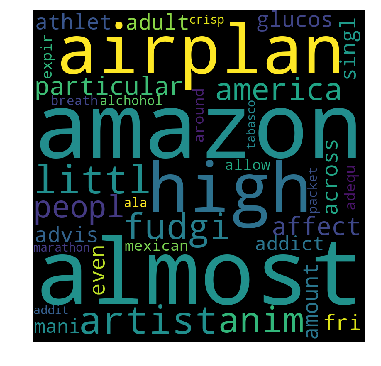

************ Top 20 Positive words *******************


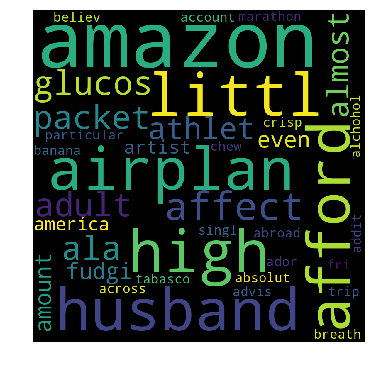

In [102]:
print("************ Top 20 Negative words *******************")
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(sn) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


print("************ Top 20 Positive words *******************")
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(sp) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [17]:
#confusion matrix, Precision score & Recall score
C = confusion_matrix(y_test, pred_bow)
A =(((C.T)/(C.sum(axis=1))).T)
B =(C/C.sum(axis=0))
labels = [0,1]

-------------------- Confusion matrix --------------------


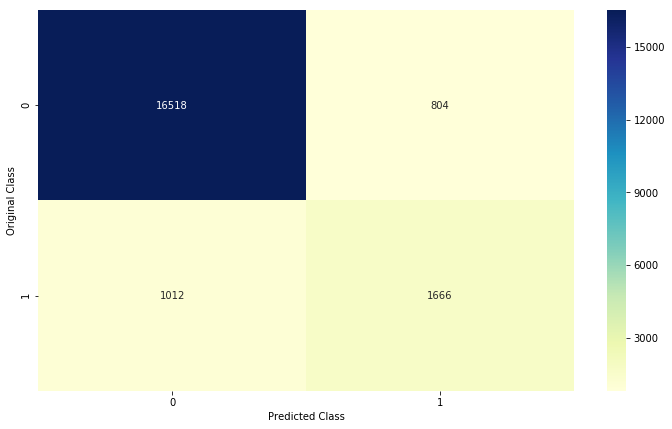

-------------------- Precision matrix (Columm Sum=1) --------------------


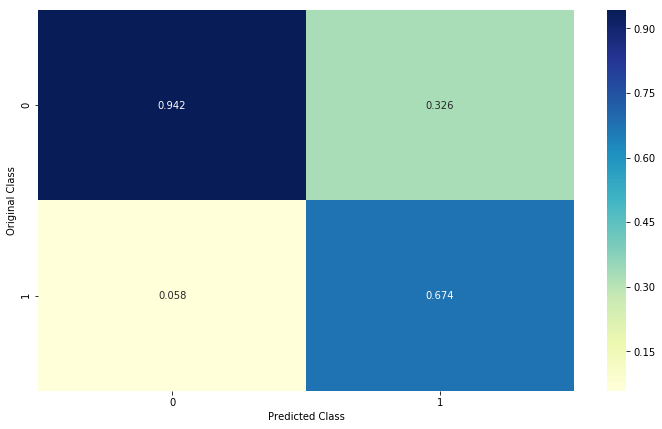

-------------------- Recall matrix (Row sum=1) --------------------


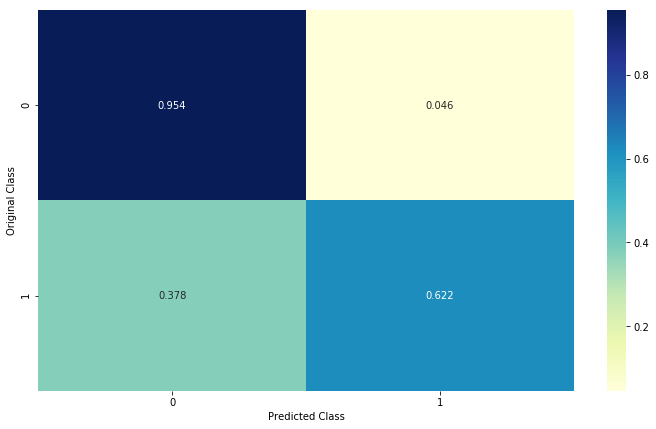

In [18]:
 print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(C, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
    
    # representing B in heatmap format
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### Fitting gridsearch cv on Tfidf

In [21]:
grid.fit(Tfidf_x_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8972174304357609
{'alpha': 0.5}


In [22]:
# Naive bayes 
mnb_optimal=BernoulliNB(alpha=0.5, binarize=0.0, fit_prior=True)

# fitting the model
mnb_optimal.fit(Tfidf_x_train, y_train)

# predict the response
pred_tfidf = mnb_optimal.predict(Tfidf_x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred_tfidf) * 100
print('\nThe accuracy of the Multinomial NB classifier for a = %d is %f%%' % (0.0001, acc))


The accuracy of the Multinomial NB classifier for a = 0 is 87.305000%


In [106]:
# Train & Test Error
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(y_train,mnb_optimal.predict(Tfidf_x_train)))
print("The overall accuracy score for the Test Data is : ", metrics.accuracy_score(y_test,pred_tfidf))

The overall accuracy score for the Train Data is :  0.9253375
The overall accuracy score for the Test Data is :  0.87305


In [108]:
#Feature importance
neg_class_prob_sorted = Mnb_optimal.feature_log_prob_[1, :].argsort()
pos_class_prob_sorted = Mnb_optimal.feature_log_prob_[0, :].argsort()

neg_bow_Mnb=neg_class_prob_sorted[::-1]
pos_bow_Mnb=pos_class_prob_sorted[::-1]

In [109]:
#Top 20 negative words
n=(np.take(count_vect.get_feature_names(), neg_bow_Mnb[:20]))
sn = ""
for i in n:
    sn += str(i)+","
print(sn)

amazon high,airplan littl,also artist,almost fudgi,anim peopl,america particular,affect glucos,adult athlet,across fri,advis singl,amount even,addict mani,almost mexican,adequ expir,allow around,alchohol breath,ala packet,also marathon,addit crisp,amazon tabasco,


In [110]:
#Top 20 positive words
p=(np.take(count_vect.get_feature_names(), pos_bow_Mnb[:20]))
sp = ""
for i in p:
    sp += str(i)+","
print(sp)

amazon high,airplan littl,afford husband,affect glucos,ala packet,adult athlet,almost fudgi,amount even,also artist,america particular,alchohol breath,advis singl,account believ,amazon tabasco,across fri,ador chew,absolut banana,addit crisp,also marathon,abroad trip,


************ Top 20 Negative words *******************


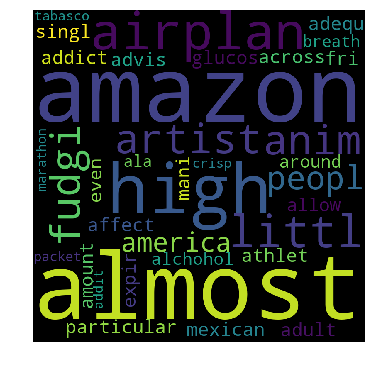

************ Top 20 Positive words *******************


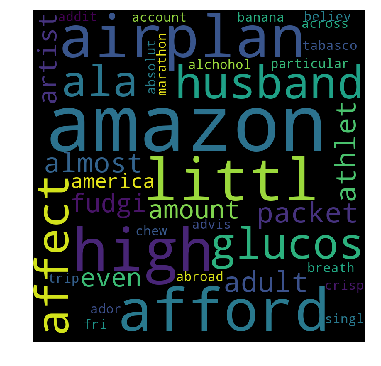

In [111]:
print("************ Top 20 Negative words *******************")
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(sn) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


print("************ Top 20 Positive words *******************")
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(sp) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [23]:
#confusion matrix, Precision score & Recall score
C = confusion_matrix(y_test, pred_tfidf)
A =(((C.T)/(C.sum(axis=1))).T)
B =(C/C.sum(axis=0))
labels = [0,1]

-------------------- Confusion matrix --------------------


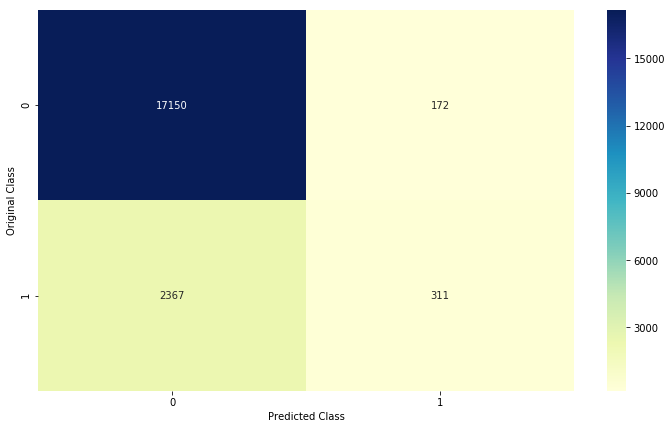

-------------------- Precision matrix (Columm Sum=1) --------------------


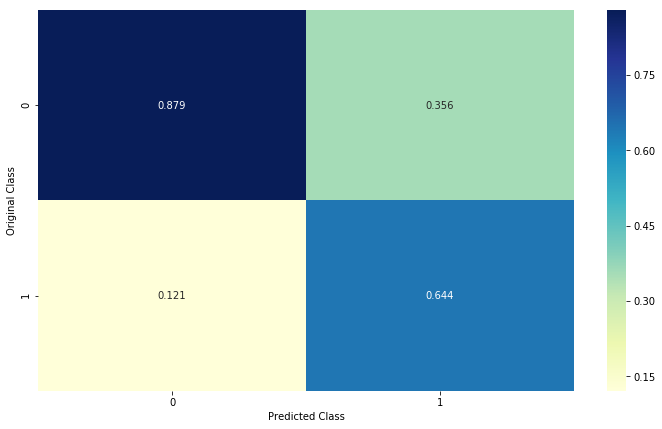

-------------------- Recall matrix (Row sum=1) --------------------


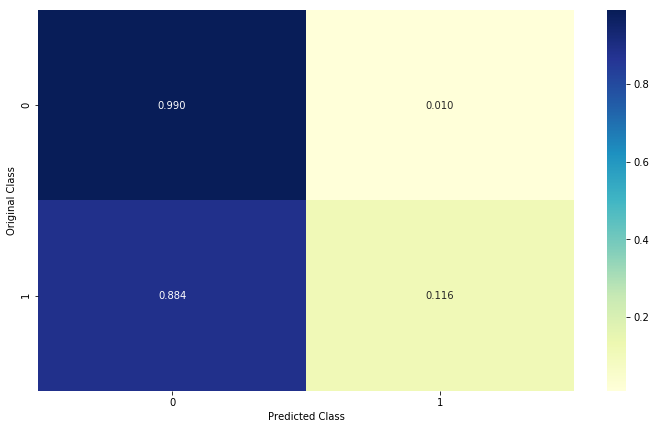

In [24]:
 print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(C, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
    
    # representing B in heatmap format
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### Bernaulli NB v/s Multinomial NB

In [121]:
!pip install prettytable

  Running setup.py bdist_wheel for prettytable: started
  Running setup.py bdist_wheel for prettytable: finished with status 'done'
  Stored in directory: C:\Users\deepak\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


In [122]:
from prettytable import PrettyTable

In [127]:
x=PrettyTable()
x.field_names = ["Model","BernualliNB_BOW", "BernualliNB_tfidf", "MultinomialNB_BOW", "MultinomialNB_Tfidf"]
x.add_row(["Hyperparameter",0.1,0.0001,0.5,0.5])
x.add_row(["Train Error",0.927,0.998,0.929,0.925])
x.add_row(["Test Error",0.900,0.881,0.909,0.873])

print(x)

+----------------+-----------------+-------------------+-------------------+---------------------+
|     Model      | BernualliNB_BOW | BernualliNB_tfidf | MultinomialNB_BOW | MultinomialNB_Tfidf |
+----------------+-----------------+-------------------+-------------------+---------------------+
| Hyperparameter |       0.1       |       0.0001      |        0.5        |         0.5         |
|  Train Error   |      0.927      |       0.998       |       0.929       |        0.925        |
|   Test Error   |       0.9       |       0.881       |       0.909       |        0.873        |
+----------------+-----------------+-------------------+-------------------+---------------------+
